In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dropout
from keras import regularizers


In [15]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
from tqdm import tqdm

In [17]:
train = pd.read_csv('data/train/train.csv')
test = pd.read_csv('data/test/test.csv')

In [18]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('data/train/train images/'+train['image'][i],target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|████████████████████████████████████████| 644/644 [00:01<00:00, 523.16it/s]


In [27]:
y=train['label'].values
y = to_categorical(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
len(X_train)

515

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // 10,
    epochs=5, verbose=1
    )

Epoch 1/5
51/51 [==============================] - 2s 30ms/step - loss: 0.5169 - accuracy: 0.8122 - val_loss: 0.5873 - val_accuracy: 0.7364
Epoch 2/5
51/51 [==============================] - 2s 30ms/step - loss: 0.5346 - accuracy: 0.7871 - val_loss: 0.5343 - val_accuracy: 0.7674
Epoch 3/5
51/51 [==============================] - 2s 30ms/step - loss: 0.5007 - accuracy: 0.7961 - val_loss: 0.5449 - val_accuracy: 0.7597
Epoch 4/5
51/51 [==============================] - 2s 31ms/step - loss: 0.5067 - accuracy: 0.7871 - val_loss: 0.5501 - val_accuracy: 0.7597
Epoch 5/5
51/51 [==============================] - 1s 20ms/step - loss: 0.4917 - accuracy: 0.8260 - val_loss: 0.5687 - val_accuracy: 0.7442


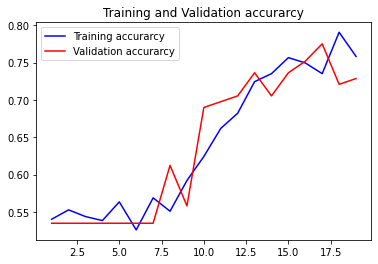

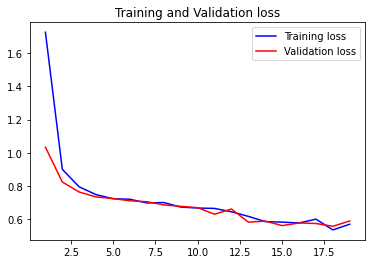

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [25]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
5/5 [==============================] - 0s 12ms/step - loss: 0.5904 - accuracy: 0.7287
Test Accuracy: 72.86821603775024


In [15]:
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

In [16]:
ypred = model.predict(X_test)

In [23]:
ypred

array([[1.42354390e-03, 9.98576403e-01],
       [2.98539791e-02, 9.70146000e-01],
       [3.34107966e-07, 9.99999642e-01],
       [9.93338227e-01, 6.66185049e-03],
       [5.26195066e-03, 9.94738042e-01],
       [1.09248105e-02, 9.89075184e-01],
       [3.83738021e-04, 9.99616265e-01],
       [9.96525228e-01, 3.47470865e-03],
       [1.14410054e-02, 9.88559008e-01],
       [9.89673734e-01, 1.03262765e-02],
       [2.12677687e-01, 7.87322283e-01],
       [1.00000000e+00, 4.20492370e-08],
       [9.80474472e-01, 1.95255969e-02],
       [1.91341009e-04, 9.99808729e-01],
       [9.99820054e-01, 1.79954717e-04],
       [3.41241956e-02, 9.65875804e-01],
       [9.23467219e-01, 7.65327513e-02],
       [5.45107424e-01, 4.54892546e-01],
       [1.23253107e-04, 9.99876738e-01],
       [1.08369760e-01, 8.91630232e-01],
       [9.94987607e-01, 5.01244096e-03],
       [1.93885453e-02, 9.80611444e-01],
       [1.62203401e-01, 8.37796628e-01],
       [2.18239450e-03, 9.97817636e-01],
       [9.900883

In [24]:
yp=np.argmax(ypred,axis=1)
yt=np.argmax(ypred,axis=1)

In [25]:
yp

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [26]:
cm(yt, yp)

array([[42,  0],
       [ 0, 87]])

In [27]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('data/test/test images/'+test['image'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/83 [00:00<?, ?it/s]/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 83/83 [00:00<00:00, 379.46it/s]


In [28]:
prediction = model.predict(test)

In [29]:
pred = np.argmax(prediction,axis=1)

In [30]:
pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [24]:
import seaborn as sns

In [69]:
import 

In [72]:
print("[INFO] Saving model...")
model.save('cnn_model.h5')
print("[INFO] Saved model...")

[INFO] Saving model...
[INFO] Saved model...


In [75]:
from keras.models import load_model

In [76]:
mod = load_model('cnn_model.h5')

In [80]:
np.argmax(mod.predict(test), axis=1)

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [82]:
import tensorflow as tf

In [83]:
tf.__version__

'2.6.0'

In [84]:
keras.__version__

'2.6.0'

In [85]:
import json

In [86]:
json.__version__

'2.0.9'